In [6]:
import torch
import sys
import numpy as np
from matplotlib import pyplot as plt

sys.path.append(r'/user/gr1/delphi/dghezzi/UNet')

from UNet import UNet, UNetWithAttention

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Crea istanza modello (deve avere la stessa architettura usata in training)
model = UNetWithAttention(in_channels=1, out_channels=1)
model.load_state_dict(torch.load("/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE/last.pth", map_location=device))
model.to(device)
model.eval()  # modalità valutazione (disabilita dropout, batchnorm, ecc)

UNetWithAttention(
  (encoder1): DoubleConv(
    (block): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (encoder2): DoubleConv(
    (block): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(i

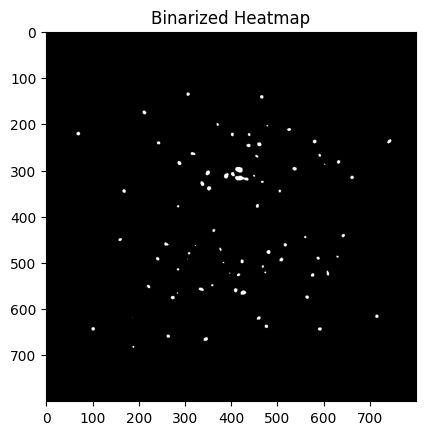

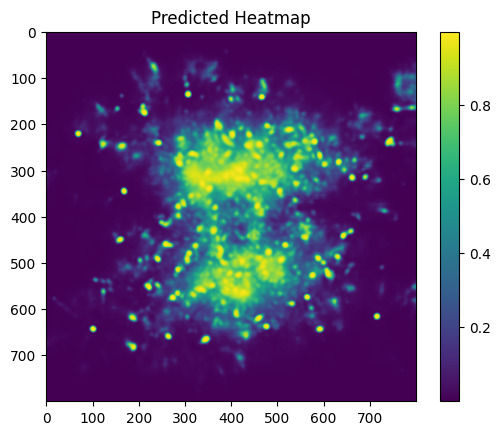

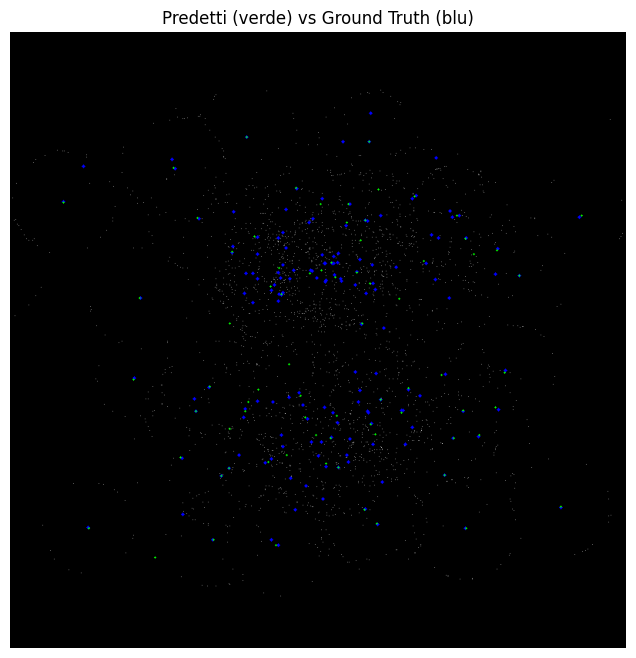

Threshold in pixels: 7.6 ==> precision: 0.8133, recall: 0.3910, f1-score: 0.5281


In [7]:
img_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/800px/images/val/event_8.npy'
csv_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/800px/centers/val/event_8_centers.csv'

from UNet import infer_keypoints_from_image, img_kp_pred_and_gr, compute_pck_metrics, load_keypoints_from_csv

heatmap, keypoints_and_cov, time = infer_keypoints_from_image(img_path, model, device=device, show_mask=True, show_heatmap=True, threshold=0.97, npy=True, sigmoid=True)
keypoints = [kp for kp, cov in keypoints_and_cov]

keypoints_gt = load_keypoints_from_csv(csv_path)

img_kp_pred_and_gr(keypoints_pred=keypoints, keypoints_gt=keypoints_gt, img_path=img_path)

pck_metrics = compute_pck_metrics(keypoints, keypoints_gt, thresholds=[7.6])
print(f'Threshold in pixels: 7.6 ==> precision: {pck_metrics[0][0]:.4f}, recall: {pck_metrics[1][0]:.4f}, f1-score: {pck_metrics[2][0]:.4f}')


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE/last.pth


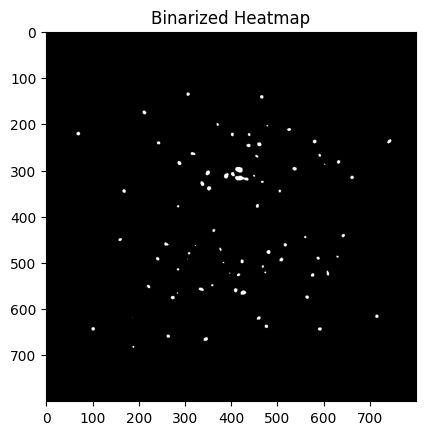

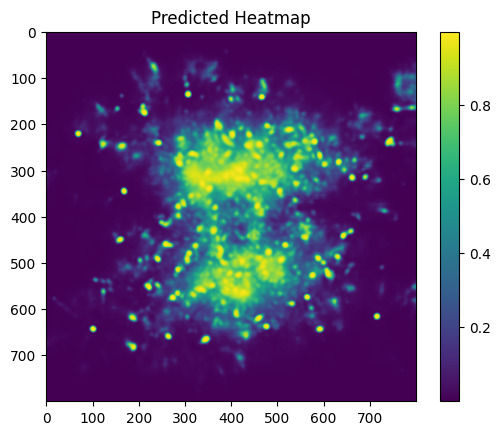

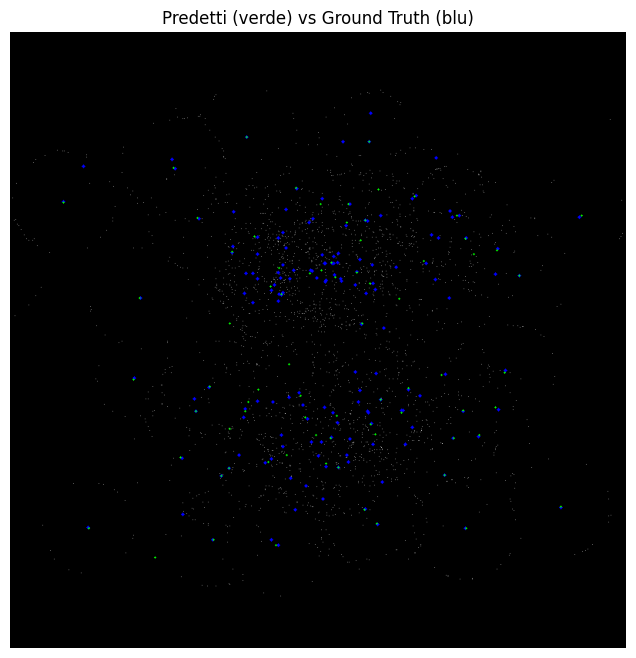

Threshold in pixels: 8 ==> precision: 0.8133, recall: 0.3910, f1-score: 0.5281
Time inference and keypoint extraction: 317.892 ms


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE0.3L1/last.pth


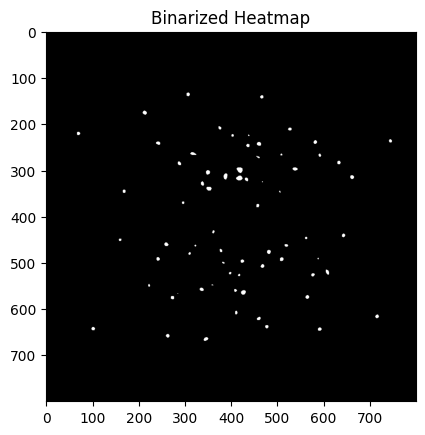

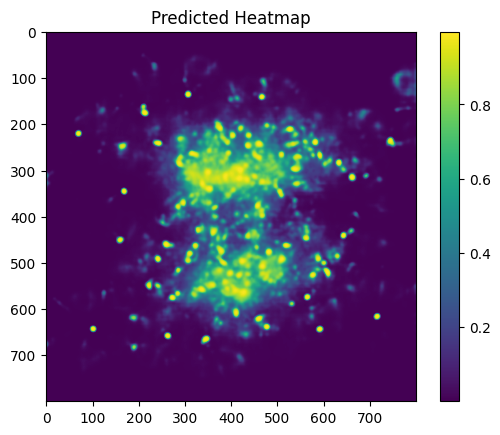

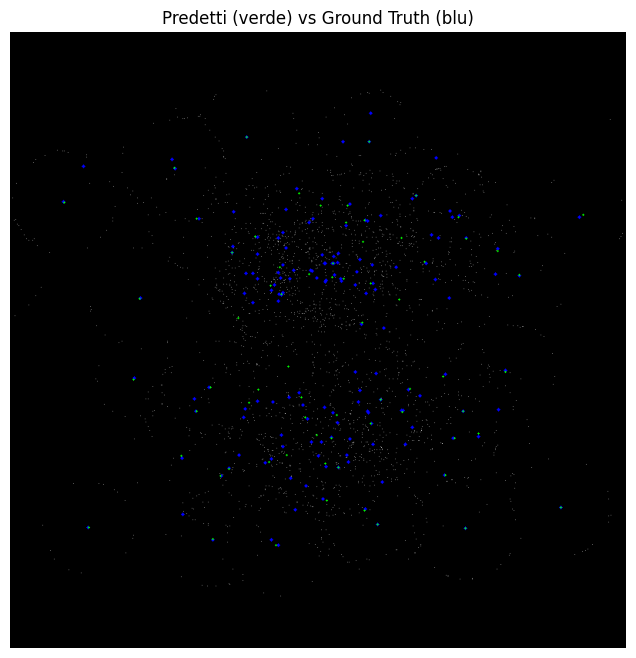

Threshold in pixels: 8 ==> precision: 0.8551, recall: 0.3782, f1-score: 0.5244
Time inference and keypoint extraction: 307.257 ms


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE0.5L1/last.pth


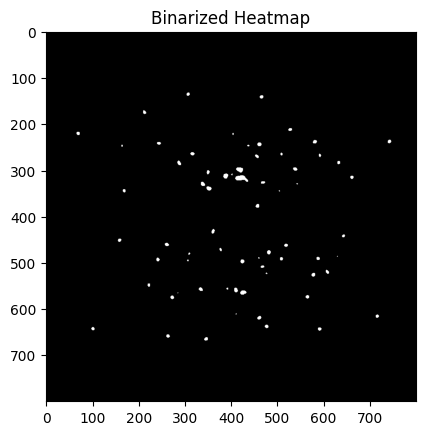

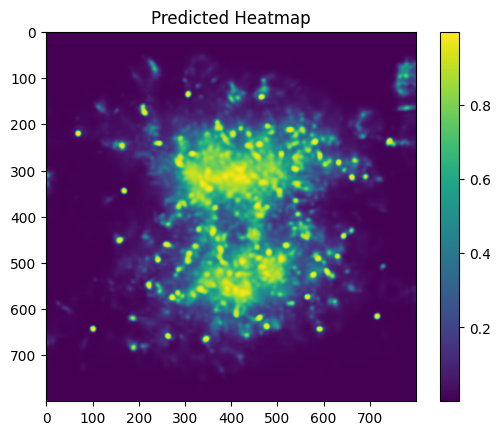

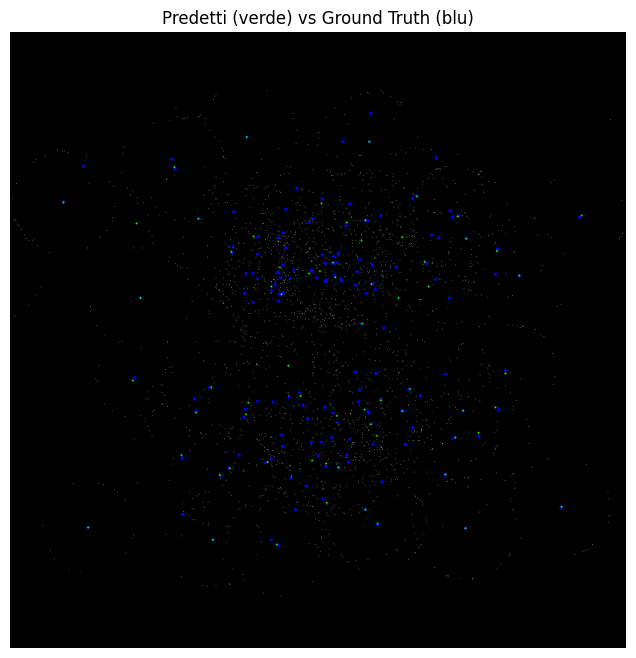

Threshold in pixels: 8 ==> precision: 0.8507, recall: 0.3654, f1-score: 0.5112
Time inference and keypoint extraction: 302.192 ms


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCEL1/last.pth


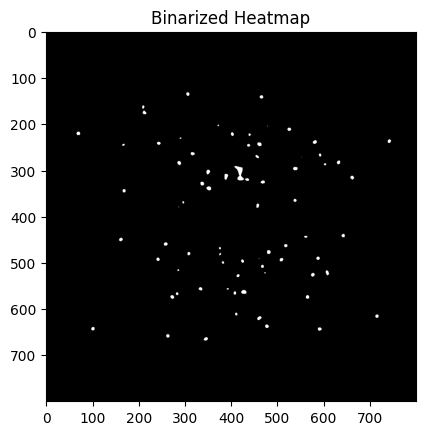

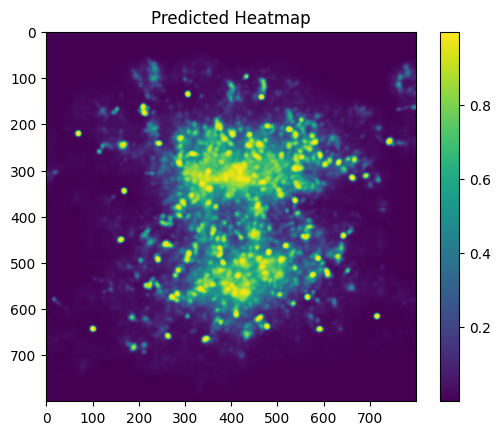

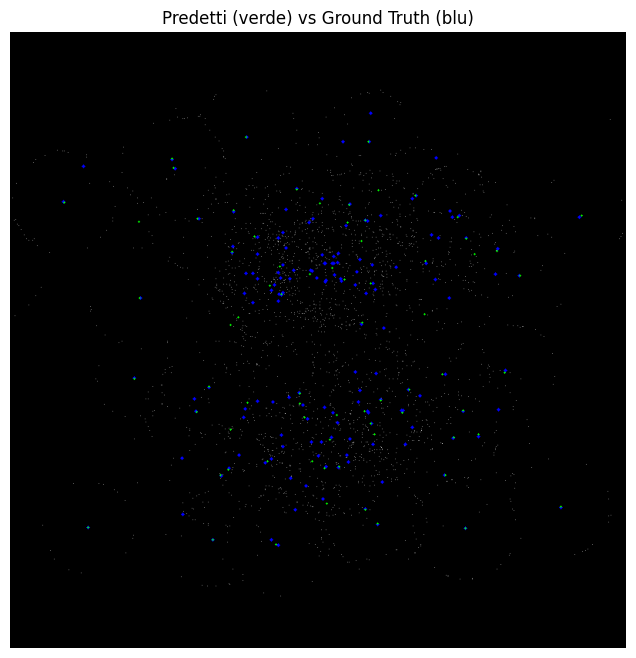

Threshold in pixels: 8 ==> precision: 0.8493, recall: 0.3974, f1-score: 0.5415
Time inference and keypoint extraction: 301.382 ms


Evaluating model: /user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE2L1/last.pth


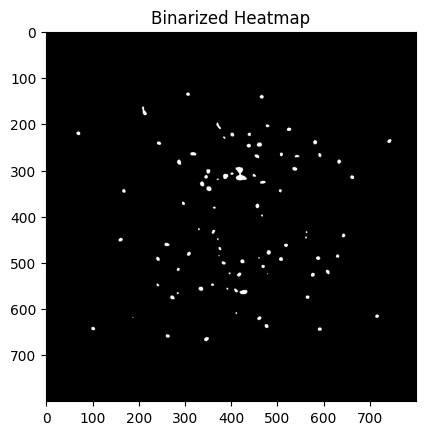

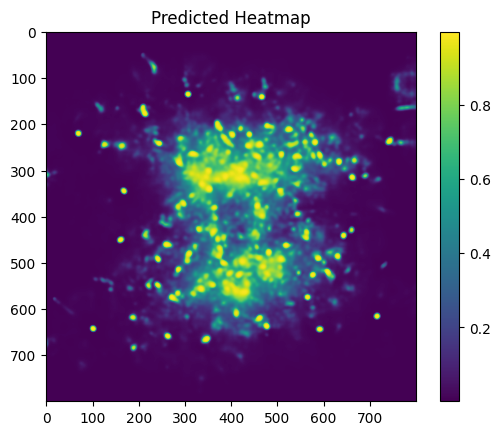

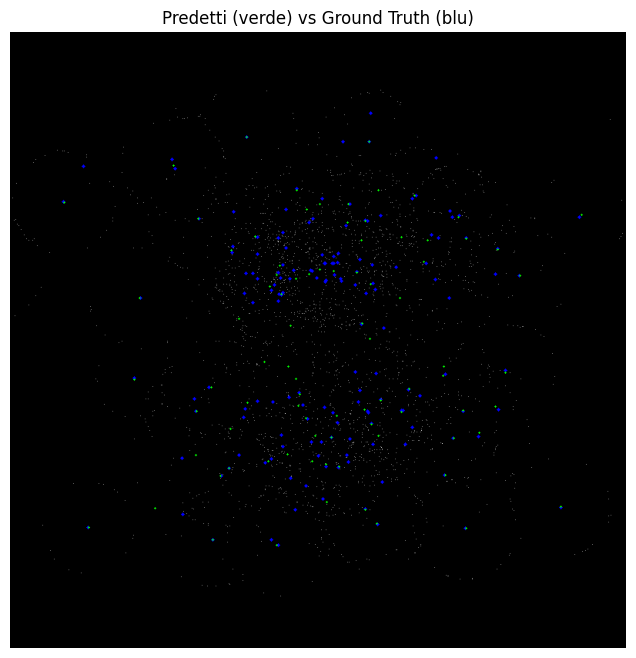

Threshold in pixels: 8 ==> precision: 0.7412, recall: 0.4038, f1-score: 0.5228
Time inference and keypoint extraction: 316.183 ms




In [10]:
# faccio il paragone tra i modelli
# 800px

model_path1 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE/last.pth'
model_path2 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE0.3L1/last.pth'
model_path3 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE0.5L1/last.pth'
model_path4 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCEL1/last.pth'
model_path5 = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/800px/lossBCE2L1/last.pth'

img_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/800px/images/val/event_8.npy'
keypoints_gt = load_keypoints_from_csv('/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/800px/centers/val/event_8_centers.csv')

for model_path in [model_path1, model_path2, model_path3, model_path4, model_path5]:
    model = UNetWithAttention(in_channels=1, out_channels=1)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    
    print(f"Evaluating model: {model_path}")
    
    heatmap, keypoints_and_cov, time = infer_keypoints_from_image(img_path, model, device=device, show_mask=True, threshold=0.97, npy=True, sigmoid=True)
    keypoints = [kp for kp, cov in keypoints_and_cov]
    
    img_kp_pred_and_gr(keypoints_pred=keypoints, keypoints_gt=keypoints_gt, img_path=img_path)
    pck_metrics = compute_pck_metrics(keypoints, keypoints_gt, thresholds=[8])
    print(f'Threshold in pixels: 8 ==> precision: {pck_metrics[0][0]:.4f}, recall: {pck_metrics[1][0]:.4f}, f1-score: {pck_metrics[2][0]:.4f}')
    print(f'Time inference and keypoint extraction: {time*1000:.3f} ms')
    print("\n")